# Traffic Violation
Create a model using logitic regression to determine the property damage based on various factors

Hypothesis testing

Create a model using random forest to evaluate the description and determine if there are any key fators that impact property damage 

Evaluate the date and time if the they play any significant role.

How does location play a role, are some locations more prone than others 

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df_raw = pd.read_csv('/Users/yogini/Downloads/Traffic_Violations_train.csv')
df = df_raw.dropna() 
print df.head()
df.columns

   Unnamed: 0 Date Of Stop Time Of Stop Agency  \
0      231432   10/06/2013     22:58:00    MCP   
1      375258   09/13/2015     01:41:00    MCP   
2      902304   09/03/2014     23:54:00    MCP   
3      955895   07/05/2015     12:45:00    MCP   
4      701179   05/11/2015     21:47:00    MCP   

                             SubAgency  \
0          3rd district, Silver Spring   
1  Headquarters and Special Operations   
2                4th district, Wheaton   
3             5th district, Germantown   
4                4th district, Wheaton   

                                         Description  \
0  DRIVE ACROSS PRIVATE PROPERTY FOR THE PURPOSE ...   
1  NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...   
2  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
3  DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REG...   
4  RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...   

                                   Location   Latitude  Longitude  Accident  \
0           BRIGGS CHANEY RD A

Index([u'Unnamed: 0', u'Date Of Stop', u'Time Of Stop', u'Agency',
       u'SubAgency', u'Description', u'Location', u'Latitude', u'Longitude',
       u'Accident', u'Belts', u'Personal Injury', u'Property Damage', u'Fatal',
       u'Commercial License', u'HAZMAT', u'Commercial Vehicle', u'Alcohol',
       u'Work Zone', u'State', u'VehicleType', u'Year', u'Make', u'Model',
       u'Color', u'Violation Type', u'Charge', u'Article',
       u'Contributed To Accident', u'Race', u'Gender', u'Driver City',
       u'Driver State', u'DL State', u'Arrest Type', u'Geolocation',
       u'stop-year', u'stop-month'],
      dtype='object')

In [123]:
df.head()

,Unnamed: 0,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,stop-year,stop-month
0,231432,10/06/2013,22:58:00,MCP,"3rd district, Silver Spring",DRIVE ACROSS PRIVATE PROPERTY FOR THE PURPOSE ...,BRIGGS CHANEY RD AT CASTLE BLVD,39.082817,-76.947782,0,...,0,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0828166666667, -76.9477816666667)",2013,10
1,375258,09/13/2015,01:41:00,MCP,Headquarters and Special Operations,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,9880 ROCKVILLE PIK / 5100 KING CHARLES W,38.983630,-77.093272,0,...,0,WHITE,M,PIKESVILLE,MD,MD,A - Marked Patrol,"(38.98363, -77.0932716666667)",2015,9
2,902304,09/03/2014,23:54:00,MCP,"4th district, Wheaton",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / CONNECTICUT,39.087468,-77.079330,0,...,0,BLACK,M,BALTIMORE,MD,MD,A - Marked Patrol,"(39.0874683333333, -77.07933)",2014,9
3,955895,07/05/2015,12:45:00,MCP,"5th district, Germantown",DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REG...,GERMANTOWN ROAD @ CRYSTAL ROCK DRIVE,39.184212,-77.255140,0,...,0,WHITE,F,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.1842116666667, -77.25514)",2015,7
4,701179,05/11/2015,21:47:00,MCP,"4th district, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,N/B I-270 PRIOR TO MIDDLEBROOK RD,39.165833,-77.240402,0,...,0,BLACK,M,GERMANTOWN,MD,MD,B - Unmarked Patrol,"(39.1658333333333, -77.2404016666667)",2015,5


Calculate the Odds ratio of Property damage where the driver ins drunk. 

In [124]:
pd.crosstab(df['Property Damage'],df['Alcohol'])

Alcohol,0,1
Property Damage,,
0,534044,1045
1,9437,68


In [125]:
od_p1=68.0/1045
od_p2=9437.0/534044
od_ratio= od_p1/od_p2

In [126]:
od_ratio

3.682440237018799

# The Odds of property damage are 3.6 times higher if the driver was drunk driving.

In [127]:
df['violation'] = 1

In [299]:
df['intercept'] = 1.0

In [312]:
df.columns

Index([u'Unnamed: 0', u'Date Of Stop', u'Time Of Stop', u'Agency',
       u'SubAgency', u'Description', u'Location', u'Latitude', u'Longitude',
       u'Accident', u'Belts', u'Personal Injury', u'Property Damage', u'Fatal',
       u'Commercial License', u'HAZMAT', u'Commercial Vehicle', u'Alcohol',
       u'Work Zone', u'State', u'VehicleType', u'Year', u'Make', u'Model',
       u'Color', u'Violation Type', u'Charge', u'Article',
       u'Contributed To Accident', u'Race', u'Gender', u'Driver City',
       u'Driver State', u'DL State', u'Arrest Type', u'Geolocation',
       u'stop-year', u'stop-month', u'intercept'],
      dtype='object')

In [363]:
#df.columns[17]
#train_cols=df.columns[17]
train_cols1=df.loc[:,['Alcohol','Belts','HAZMAT','intercept']]
train_cols=train_cols1.columns[:]
#train_cols=df.columns[:"Alcohol":]
#train_cols
#train_cols.append(df.columns[14:19])

In [364]:
train_cols

Index([u'Alcohol', u'Belts', u'HAZMAT', u'intercept'], dtype='object')

In [365]:
logit = sm.Logit(df['Property Damage'], df[train_cols])

In [366]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.086339
         Iterations 8


In [328]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:        Property Damage   No. Observations:               680743
Model:                          Logit   Df Residuals:                   680739
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Jan 2017   Pseudo R-squ.:                 0.01697
Time:                        20:49:59   Log-Likelihood:                -58775.
converged:                       True   LL-Null:                       -59789.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Alcohol        1.4632      0.109     13.417      0.000         1.249     1.677
Belts          1.4254      0.028     51.226      0.000         1.371     1.480
HAZMAT         0.6362      0.594      1.070      0.2

In [138]:
print np.exp(result.params)

Alcohol    0.065657
Belts      0.064409
HAZMAT     0.038860
dtype: float64


<script src="http://code.highcharts.com/highcharts.js"></script>

In [164]:
import pandas_highcharts
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

#train_sub= train
chart = serialize(df_date_stop_snt, render_to="my-chart", title="My Chart")
display_charts(df_date_stop_snt, polar=True, kind='line', ylim=(0, 1000), title='Angel Deals By Sector')


In [273]:
df_ts_train = pd.read_csv('/Users/yogini/Downloads/Traffic_Violations_train_timeseries.csv')
df_ts_train_na = df_ts_train.dropna() 
print df_ts_train.head()
df_ts_train.columns

   Unnamed: 0 Date Of Stop Time Of Stop Agency  \
0           1   12/20/2012     00:41:00    MCP   
1           2   07/20/2012     23:12:00    MCP   
2           3   03/19/2012     16:10:00    MCP   
3           4   12/01/2014     12:52:00    MCP   
4           5   06/09/2012     21:19:00    MCP   

                                         SubAgency  \
0                           2nd district, Bethesda   
1                         5th district, Germantown   
2                           2nd district, Bethesda   
3  6th district, Gaithersburg / Montgomery Village   
4                      3rd district, Silver Spring   

                                         Description  \
0                  DRIVING WHILE IMPAIRED BY ALCOHOL   
1                       FAILURE TO STOP AT STOP SIGN   
2  DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...   
3                 FAILURE STOP AND YIELD AT THRU HWY   
4       OCCUPANT UNDER 16 NOT RESTRAINED BY SEATBELT   

                                 Loca

Index([u'Unnamed: 0', u'Date Of Stop', u'Time Of Stop', u'Agency',
       u'SubAgency', u'Description', u'Location', u'Latitude', u'Longitude',
       u'Accident', u'Belts', u'Personal Injury', u'Property Damage', u'Fatal',
       u'Commercial License', u'HAZMAT', u'Commercial Vehicle', u'Alcohol',
       u'Work Zone', u'State', u'VehicleType', u'Year', u'Make', u'Model',
       u'Color', u'Violation Type', u'Charge', u'Article',
       u'Contributed To Accident', u'Race', u'Gender', u'Driver City',
       u'Driver State', u'DL State', u'Arrest Type', u'Geolocation',
       u'stop-year', u'stop-month'],
      dtype='object')

   Unnamed: 0 Date Of Stop Time Of Stop Agency                    SubAgency  \
0         267   03/07/2016     15:28:00    MCP      1st district, Rockville   
1         269   02/20/2016     05:17:00    MCP  3rd district, Silver Spring   
2         296   01/13/2016     19:36:00    MCP        4th district, Wheaton   
3         304   02/19/2016     00:14:00    MCP       2nd district, Bethesda   
4         341   03/04/2016     07:13:00    MCP        4th district, Wheaton   

                                         Description  \
0  HOLDER OF LEARNER'S PERMIT DRIVING W/O REQ. SU...   
1                  DRIVER CHANGING LANES WHEN UNSAFE   
2  PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...   
3  PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...   
4  PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...   

                           Location   Latitude  Longitude  Accident  \
0               16411 SHADYGROVE RD  39.124695 -77.175415         0   
1  NEW HAMPSHIRE AVE /COLUMBIA PIKE  39.049767

Index([u'Unnamed: 0', u'Date Of Stop', u'Time Of Stop', u'Agency',
       u'SubAgency', u'Description', u'Location', u'Latitude', u'Longitude',
       u'Accident', u'Belts', u'Personal Injury', u'Property Damage', u'Fatal',
       u'Commercial License', u'HAZMAT', u'Commercial Vehicle', u'Alcohol',
       u'Work Zone', u'State', u'VehicleType', u'Year', u'Make', u'Model',
       u'Color', u'Violation Type', u'Charge', u'Article',
       u'Contributed To Accident', u'Race', u'Gender', u'Driver City',
       u'Driver State', u'DL State', u'Arrest Type', u'Geolocation',
       u'stop-year', u'stop-month'],
      dtype='object')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [274]:
df_date_stop_snt= df_ts_train_na.groupby(["Date Of Stop"]).size().reset_index(name='count')

In [275]:
#df_date_stop_snt = df_date_stop_snt.set_index("Date Of Stop")
display_charts(df_date_stop_snt,polar=True,kind='line',ylim=(0, 1000), title="my first test")


In [276]:
df_date_stop_snt.columns

Index([u'Date Of Stop', u'count'], dtype='object')

In [277]:
#df_date_stop_snt['Date Of Stop'] = df_date_stop_snt['Date Of Stop'].astype("datetime64[ns]")
#df_date_stop_snt = df_date_stop_snt.set_index("Date Of Stop")
df_date_stop_snt['Date Of Stop']=pd.to_datetime(df_date_stop_snt['Date Of Stop'])

df_date_stop_snt.head()

,Date Of Stop,count
0,2012-01-01,130
1,2013-01-01,333
2,2014-01-01,438
3,2015-01-01,481
4,2012-01-02,263


In [278]:
df_freq = pd.DataFrame({"Date Of Stop" : df_date_stop_snt["Date Of Stop"], "count" : df_date_stop_snt["count"]})

In [279]:
df_freq.head()

,Date Of Stop,count
0,2012-01-01,130
1,2013-01-01,333
2,2014-01-01,438
3,2015-01-01,481
4,2012-01-02,263


In [280]:

df_freq['Date Of Stop']=pd.to_datetime(df_freq["Date Of Stop"])
#df_freq = df_freq.set_index("Date Of Stop")
#df_freq.head()

In [281]:
df_freq = df_freq.set_index("Date Of Stop")

In [282]:
df_freq.head(40)

,count
Date Of Stop,
2012-01-01,130
2013-01-01,333
2014-01-01,438
2015-01-01,481
2012-01-02,263
2013-01-02,462
2014-01-02,243
2015-01-02,527
2012-01-03,287


In [283]:
display_charts(df_freq,polar=True, title="my first test")

In [284]:
df_date_stop_snt['Date Of Stop'] = pd.to_datetime(df_date_stop_snt['Date Of Stop'])
df_date_stop_snt.set_index('Date Of Stop', inplace=True)

In [346]:
df_date_cnt = df_date_stop_snt[['count']].resample('W', 'sum')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


In [347]:
df_date_cnt.head(30)

,count
Date Of Stop,
2012-01-01,130
2012-01-08,1958
2012-01-15,2069
2012-01-22,1777
2012-01-29,1988
2012-02-05,1971
2012-02-12,2011
2012-02-19,2362
2012-02-26,2234


In [348]:
df_date_cnt.tail(30)

,count
Date Of Stop,
2015-06-14,4877
2015-06-21,3818
2015-06-28,3331
2015-07-05,3621
2015-07-12,3536
2015-07-19,4243
2015-07-26,3472
2015-08-02,3986
2015-08-09,4013


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  if __name__ == '__main__':


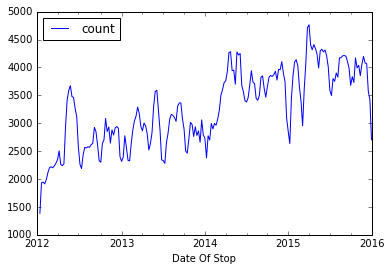

In [349]:
pd.rolling_mean(df_date_cnt[['count']], 3).plot()

In [350]:
print('Autocorrelation 1: ', df_date_cnt['count'].autocorr(1))
print('Autocorrelation 3: ', df_date_cnt['count'].autocorr(3))
print('Autocorrelation 40: ', df_date_cnt['count'].autocorr(27))

('Autocorrelation 1: ', 0.66696053036268865)
('Autocorrelation 3: ', 0.55566110459142304)
('Autocorrelation 40: ', 0.46603395574838574)


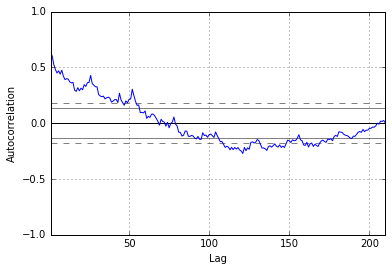

In [351]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df_date_cnt['count'])

In [291]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [335]:
from statsmodels.tsa.arima_model import ARMA

df_date_cnt = df_date_cnt[['count']].astype(float)
model = ARMA(df_date_cnt, (1, 0,1)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:                  count   No. Observations:                  210
Model:                     ARMA(1, 0)   Log Likelihood               -1639.613
Method:                       css-mle   S.D. of innovations            594.184
Date:                Wed, 18 Jan 2017   AIC                           3285.227
Time:                        20:59:47   BIC                           3295.268
Sample:                    01-01-2012   HQIC                          3289.286
                         - 01-03-2016                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        3197.9765    132.335     24.166      0.000      2938.604  3457.349
ar.L1.count     0.6924      0.053     13.017      0.000         0.588     0.797
                                    Roots       

In [342]:
model = sm.tsa.ARIMA(df_date_cnt, (1, 1, 0)).fit()

#predictions = model.predict(
#    '2016-01-31',
#    '2016-06-30',
#    dynamic=True, 
#)

#print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  209
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1624.700
Method:                       css-mle   S.D. of innovations            574.910
Date:                Wed, 18 Jan 2017   AIC                           3255.400
Time:                        21:04:28   BIC                           3265.427
Sample:                    01-08-2012   HQIC                          3259.454
                         - 01-03-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             8.3611     27.528      0.304      0.762       -45.592    62.314
ar.L1.D.count    -0.4468      0.063     -7.046      0.000        -0.571    -0.323
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2381           +0.0000j            2.2381            0.5000
-----------------------------------------------------------------------------
"""

In [371]:
model.resid.autocorr(12)

0.044133070290774568

In [ ]:
df_date_cnt['count'].autocorr(1)